# Loading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('mushroom.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
## Checking NaN values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
for col in df:
    if df[col].dtypes=='object':
        print(df[col].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [13]:
df['stalk-root']=df['stalk-root'].replace('?','unknown')

# Split data

In [45]:
x=df.drop('class',axis=1)
y=df['class']
print(x.shape) ,print(y.shape)

(8124, 22)
(8124,)


(None, None)

# Label Encoding for Target

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [71]:
y=le.fit_transform(df['class'])
y

array([1, 0, 0, ..., 0, 1, 0])

In [72]:
### one hot encoding of target
X=pd.get_dummies(x,drop_first=True)

In [73]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


# Train_Test_Split

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

In [75]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5686, 95), (2438, 95), (5686,), (2438,))

# Apply PCA

In [76]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)       ## to Avoide data leakage we only perform fit_transform on training dataset

In [77]:
X_train.shape,X_test.shape

((5686, 5), (2438, 5))

# Model Building

In [78]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [79]:
lr.score(X_train,y_train)

0.9331691874780161

In [80]:
lr_pred=lr.predict(X_test)

In [81]:
## model Evalutation
print('Accuracy_score:',accuracy_score(y_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(y_test,lr_pred))
print('Classifiction Report:',classification_report(y_test,lr_pred))

Accuracy_score: 0.9212469237079574
Confusion Matrix: [[1208   49]
 [ 143 1038]]
Classifiction Report:               precision    recall  f1-score   support

           0       0.89      0.96      0.93      1257
           1       0.95      0.88      0.92      1181

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



# Roc-Auc-Curve

In [82]:
from sklearn.metrics import roc_curve,roc_auc_score

In [83]:
lr_pred_prob=lr.predict_proba(X_test)[:,1]
lr_pred_prob

array([0.02129308, 0.9445879 , 0.99841983, ..., 0.99876014, 0.36993621,
       0.10042467])

In [84]:
fpr,tpr,thresholds=roc_curve(y_test,lr_pred_prob)

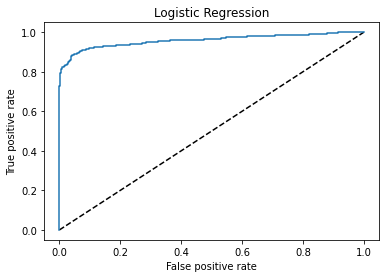

In [86]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [90]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [133]:
dt.score(X_train,y_train)

1.0

In [101]:
dt_pred=dt.predict(X_test)

In [102]:
## model Evalutation
print('Accuracy_score:',accuracy_score(y_test,dt_pred))
print('Confusion Matrix:',confusion_matrix(y_test,dt_pred))
print('Classifiction Report:',classification_report(y_test,dt_pred))

Accuracy_score: 0.9922067268252666
Confusion Matrix: [[1250    7]
 [  12 1169]]
Classifiction Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1257
           1       0.99      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [103]:
dt_pred_prob=dt.predict_proba(X_test)[:,1]

In [104]:
fpr,tpr,thresholds=roc_curve(y_test,dt_pred_prob)

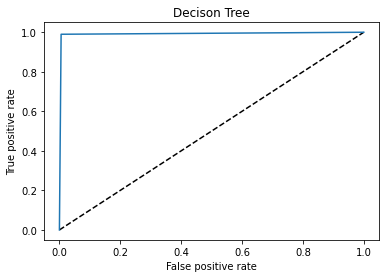

In [107]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decison Tree')
plt.show()

In [108]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=12)
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [132]:
kn.score(X_train,y_train)

0.99349278930707

In [109]:
kn_pred=kn.predict(X_test)

In [110]:
## model Evalutation
print('Accuracy_score:',accuracy_score(y_test,kn_pred))
print('Confusion Matrix:',confusion_matrix(y_test,kn_pred))
print('Classifiction Report:',classification_report(y_test,kn_pred))

Accuracy_score: 0.9917965545529123
Confusion Matrix: [[1248    9]
 [  11 1170]]
Classifiction Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1257
           1       0.99      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [120]:
##SVM
from sklearn.svm import SVC
scv=SVC(kernel='rbf')
scv.fit(X_train,y_train)

SVC()

In [131]:
scv.score(X_train,y_train)

0.9803024973619416

In [121]:
svc_pred=scv.predict(X_test)

In [122]:
## model Evalutation
print('Accuracy_score:',accuracy_score(y_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(y_test,svc_pred))
print('Classifiction Report:',classification_report(y_test,svc_pred))

Accuracy_score: 0.9737489745693191
Confusion Matrix: [[1209   48]
 [  16 1165]]
Classifiction Report:               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1257
           1       0.96      0.99      0.97      1181

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



In [123]:
##Naive bayes
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_test,y_test)

GaussianNB()

In [130]:
gb.score(X_train,y_train)

0.8948294055575097

In [124]:
gb_pred=gb.predict(X_test)

In [125]:
## model Evalutation
print('Accuracy_score:',accuracy_score(y_test,gb_pred))
print('Confusion Matrix:',confusion_matrix(y_test,gb_pred))
print('Classifiction Report:',classification_report(y_test,gb_pred))

Accuracy_score: 0.8917145200984413
Confusion Matrix: [[1218   39]
 [ 225  956]]
Classifiction Report:               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1257
           1       0.96      0.81      0.88      1181

    accuracy                           0.89      2438
   macro avg       0.90      0.89      0.89      2438
weighted avg       0.90      0.89      0.89      2438



In [126]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [127]:
rf_pred=rf.predict(X_test)

In [129]:
rf.score(X_train,y_train)

1.0

In [128]:
## model Evalutation
print('Accuracy_score:',accuracy_score(y_test,rf_pred))
print('Confusion Matrix:',confusion_matrix(y_test,rf_pred))
print('Classifiction Report:',classification_report(y_test,rf_pred))

Accuracy_score: 0.9950779327317474
Confusion Matrix: [[1253    4]
 [   8 1173]]
Classifiction Report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1257
           1       1.00      0.99      0.99      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Cross Validation Score

In [134]:
from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(rf,X,y,cv=10)
print('Cross validation of RF model:',cross_validation)
print('Mean cross Validation score:',cross_validation.mean())
print('Standard Deviation:',cross_validation.std())

Cross validation of RF model: [0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.97660099 1.        ]
Mean cross Validation score: 0.9661717836390187
Standard Deviation: 0.09394436070833406


In [135]:
## Decison Tree
from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(dt,X,y,cv=10)
print('Cross validation of RF model:',cross_validation)
print('Mean cross Validation score:',cross_validation.mean())
print('Standard Deviation:',cross_validation.std())

Cross validation of RF model: [0.68511685 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean cross Validation score: 0.9685116851168513
Standard Deviation: 0.09446494464944649


# Saving the Best Model

In [138]:
import pickle
file='mushroom_rf.pkl'
pickle.dump(rf,open(file,'wb'))